# Data Visualization

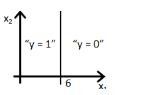

## Tufte’s 6 Principles for Graphical Integrity

1. Comparisons:  Show data by comparisons (bar charts and the like) to depict contrasts and differences between dependent variables.

2. Causality:  Demonstrate how one or more independent variables impact or influence dependent variables.

3. Multivariate: Various data are combined so an audience can easily interpret an otherwise complex narrative.

4. Integration:  Incorporate various modes of information (texts, maps, calculations, diagrams, etc.), to show evidence of source data-to-findings. 

5. Documentation:  For credibility, include attribution, detailed titles, and measurements (scales).

6. Context: Describe or depict the before and after state. Show trend lines to hint at results in the future.



In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(13,10)})

In [14]:
# Load Diamonds Dataset from seaborn library
df_diamonds=sns.load_dataset("diamonds")
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [15]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [16]:
df_diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

You can check the column descriptions from kaggle
https://www.kaggle.com/shivam2503/diamonds

In [17]:
df_diamonds.cut.unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

In [18]:
df_diamonds.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [19]:
import pandas as pd

In [20]:
from pandas.api.types import CategoricalDtype

In [21]:
# Order categorical data from fair to ideal (Fair, Good, Very Good, Premium, Ideal)
df_diamonds.cut=df_diamonds.cut.astype(CategoricalDtype(ordered=True,categories=["Fair","Good","Very Good","Premium","Ideal"]))

In [22]:
df_diamonds["cut"]

0            Ideal
1          Premium
2             Good
3          Premium
4             Good
           ...    
53935        Ideal
53936         Good
53937    Very Good
53938      Premium
53939        Ideal
Name: cut, Length: 53940, dtype: category
Categories (5, object): ['Fair' < 'Good' < 'Very Good' < 'Premium' < 'Ideal']

## Horizontal Bar Plot


Text(0.5, 1.0, 'Class Frequencies of the Cut Variable')

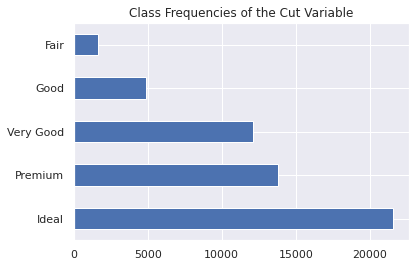

In [11]:
df_diamonds["cut"].value_counts().plot.barh().set_title("Class Frequencies of the Cut Variable")

## Vertical Bar Plot


Text(0.5, 1.0, 'Class Frequencies of the Cut Variable')

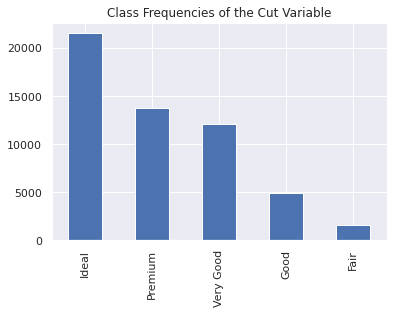

In [12]:
df_diamonds["cut"].value_counts().plot.bar().set_title("Class Frequencies of the Cut Variable")

## Line Plot


Text(0.5, 1.0, 'Class Frequencies of the Cut Variable')

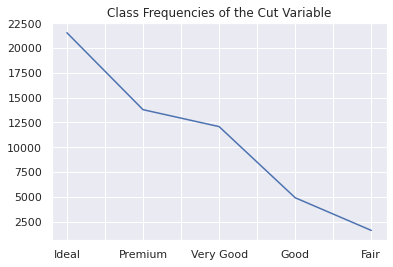

In [13]:
df_diamonds["cut"].value_counts().plot.line().set_title("Class Frequencies of the Cut Variable")

## Joint Plot


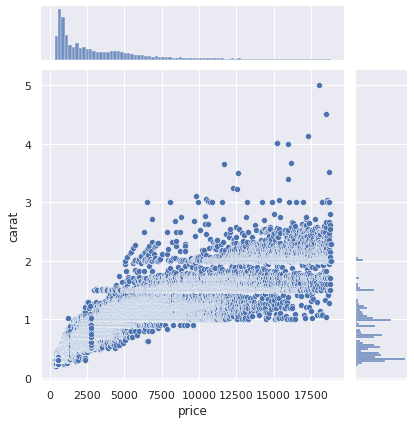

In [14]:
sns.jointplot(x="price",y=df_diamonds["carat"],data=df_diamonds)

## SOR???

Text(0.5, 1.0, 'Cut Density')

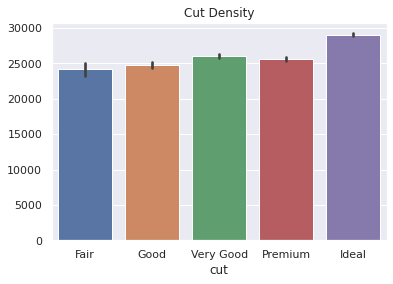

In [15]:
# Grouped Bar Chart
sns.barplot(x="cut",y=df_diamonds.cut.index,data=df_diamonds).set_title("Cut Density")

## Catplot


Text(0.5, 1.0, 'Cut - Price')

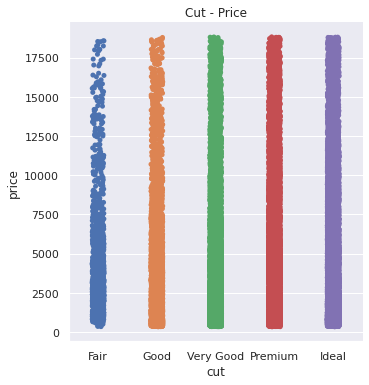

In [16]:
# Category Plot is for visualizing categorical values
sns.catplot(x="cut",y="price",data=df_diamonds)
plt.title("Cut - Price")

##Bar Plot

Text(0.5, 1.0, 'Cut - Price - Color')

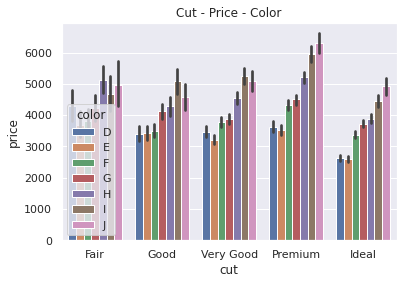

In [17]:
# Grouped Bar Chart
sns.barplot(x = "cut",
            y="price",
            hue="color",
            data=df_diamonds)
plt.title("Cut - Price - Color")

In [18]:
df_diamonds.groupby(["cut","color"])["price"].mean()

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Very Good  D        3470.467284
           E        3214.652083
           F        3778.820240
           G        3872.753806
           H        4535.390351
           I        5255.879568
           J        5103.513274
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Ideal      D        2629.094566
           E        2597.550090
           F        337

## Histogram

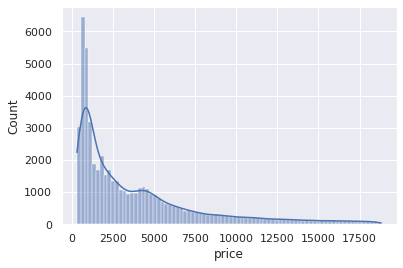

In [19]:
sns.histplot(df_diamonds.price,
             kde=True) # kde = kernel density estimation 

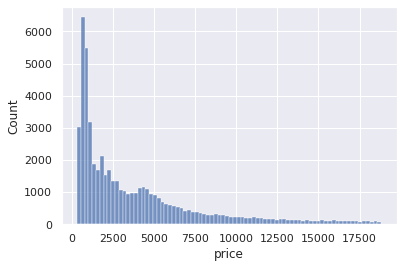

In [20]:
sns.histplot(df_diamonds.price)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


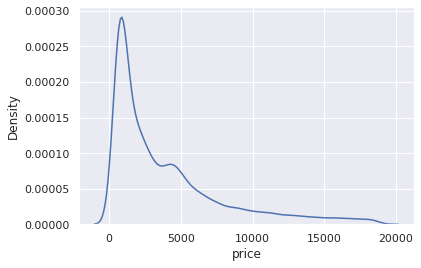

In [21]:
# just to see the density plot
sns.distplot(df_diamonds.price,
             hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


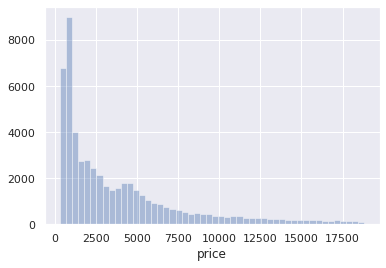

In [22]:
sns.distplot(df_diamonds.price, 
             kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


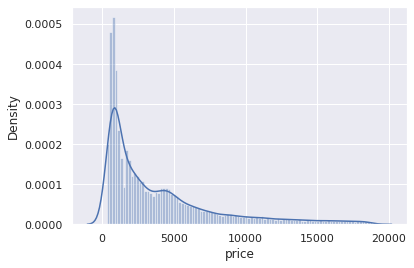

In [23]:
sns.distplot(df_diamonds.price, 
             bins=100, 
             kde=True, 
             hist=True)

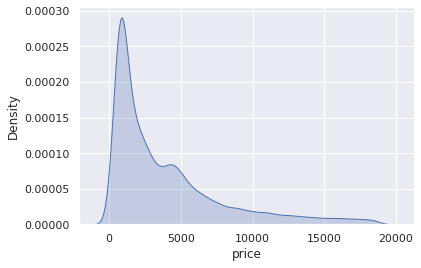

In [24]:
sns.kdeplot(df_diamonds.price, shade=True)

Text(0.5, 1.0, 'Cut - Price')

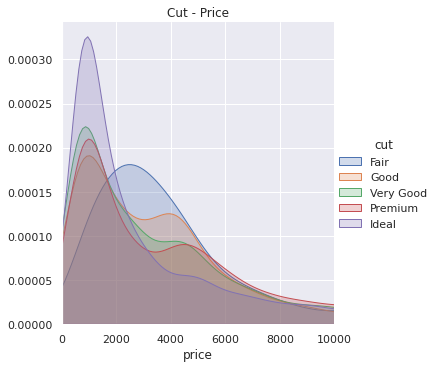

In [25]:
(sns
 .FacetGrid(df_diamonds,
            hue="cut", 
            height=5,
            xlim = (0, 10000))
.map(sns.kdeplot, "price", shade=True)
.add_legend())
plt.title('Cut - Price')

Text(0.5, 1.0, 'Color - Price')

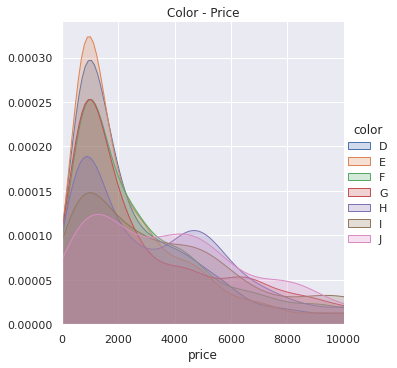

In [26]:
(sns
.FacetGrid(df_diamonds,
          hue="color",
          height=5,
          xlim = (0, 10000))
.map(sns.kdeplot,"price",shade=True)
.add_legend())
plt.title('Color - Price')

Text(0.5, 1.0, 'Cut - Price - Color')

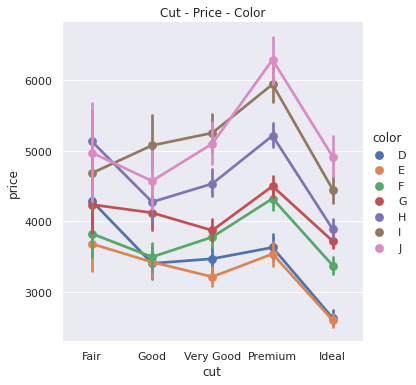

In [27]:
(sns
.catplot(x="cut",
         y="price",
         hue="color",
         kind="point",
         data=df_diamonds))
plt.title('Cut - Price - Color')

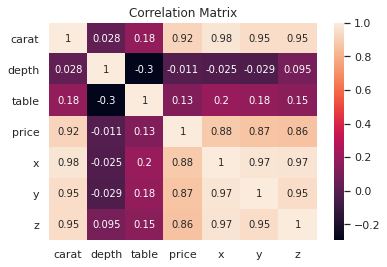

In [28]:
plt.title('Correlation Matrix')
sns.heatmap(df_diamonds.corr(), annot= True)

#Preproccesing

In [1]:
!cp /content/drive/MyDrive/Veri\ Analizi/Datasets/airbnb_nyc_final.csv -r /content

In [2]:
import pandas as pd
df = pd.read_csv("airbnb_nyc_final.csv",delimiter=",",encoding="utf-8")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (11,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,date,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.9419,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.1,1,0


In [3]:
df.columns # print the column names of the dataframe

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'date', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [4]:
df.drop(["name","id","host_id","host_name"],inplace=True,axis=1) # drop the unnecessary columns 
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'date',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
df.info() # shows the non-null counts and dtypes of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   latitude                        48895 non-null  object
 3   longitude                       48895 non-null  object
 4   room_type                       48895 non-null  object
 5   price                           48895 non-null  object
 6   minimum_nights                  48895 non-null  object
 7   number_of_reviews               48895 non-null  object
 8   date                            38857 non-null  object
 9   reviews_per_month               38848 non-null  object
 10  calculated_host_listings_count  48881 non-null  object
 11  availability_365                48890 non-null  object
dtypes: object(12)
memory usage: 4.5+ MB


In [6]:
df.isna().sum() # shows the number of nan values per column

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
date                              10038
reviews_per_month                 10047
calculated_host_listings_count       14
availability_365                      5
dtype: int64

In [7]:
df.drop(index=df.loc[df["date"].isna()==True].index,inplace=True) # drops nan values in a specific column
df.isna().sum()

neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
date                               0
reviews_per_month                  9
calculated_host_listings_count    14
availability_365                   5
dtype: int64

## Imputation for float and integer variables

In [8]:
integers = ["minimum_nights","number_of_reviews","calculated_host_listings_count","availability_365"]
floats = ["price","reviews_per_month","calculated_host_listings_count","latitude","longitude"]

for integer in integers:
  try:
    df[integer] = df[integer].astype("int")
  except ValueError:
    df[integer] = pd.to_numeric(df[integer],errors="coerce")
    df[integer] = df[integer].fillna(df[integer].mean())
    df[integer] = df[integer].astype("int")
  
for _float in floats:
  try:
    df[_float] = df[_float].astype("float64")
  except ValueError:
    df[_float] = pd.to_numeric(df[_float],errors="coerce")
    df[_float] = df[_float].fillna(df[_float].mean())
    df[_float] = df[_float].astype("float64")


In [9]:
df.groupby("room_type")["room_type"].value_counts()

room_type     room_type   
-73.78175     -73.78175           1
-73.7823      -73.7823            1
-73.78237     -73.78237           1
-73.78275     -73.78275           1
-73.7961      -73.7961            1
                              ...  
Erin V.       Erin V.             1
Private room  Private room    17630
Shared room   Shared room       840
South Slope   South Slope         1
Sunnyside     Sunnyside           1
Name: room_type, Length: 85, dtype: int64

In [10]:
for index,row in df.iterrows():
  room_type = row["room_type"]
  try:
    room_type = float(room_type)
    isdigit = True  
  except ValueError:
    isdigit = False
  if isdigit:
      df.drop(index,inplace=True)

df.groupby(by="room_type")["room_type"].value_counts()

room_type        room_type      
Entire home/apt  Entire home/apt    20305
Erin V.          Erin V.                1
Private room     Private room       17630
Shared room      Shared room          840
South Slope      South Slope            1
Sunnyside        Sunnyside              1
Name: room_type, dtype: int64

In [12]:
for key,value in df.groupby(by="room_type")["room_type"].value_counts().items():
  if value == 1:
    df.drop(df.loc[df["room_type"]==key[0]].index,inplace=True,axis=0) # it returns key as tuple 
df.groupby(by="room_type")["room_type"].value_counts()

room_type        room_type      
Entire home/apt  Entire home/apt    20305
Private room     Private room       17630
Shared room      Shared room          840
Name: room_type, dtype: int64

In [9]:
df["room_type"] = df["room_type"].astype("string")

In [10]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
date                              0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38857 entries, 0 to 48852
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             38857 non-null  string 
 1   neighbourhood                   38857 non-null  string 
 2   latitude                        38857 non-null  float64
 3   longitude                       38857 non-null  float64
 4   room_type                       38857 non-null  string 
 5   price                           38857 non-null  float64
 6   minimum_nights                  38857 non-null  int64  
 7   number_of_reviews               38857 non-null  int64  
 8   date                            38857 non-null  object 
 9   reviews_per_month               38857 non-null  float64
 10  calculated_host_listings_count  38857 non-null  float64
 11  availability_365                38857 non-null  int64  
dtypes: float64(5), int64(3), object(

In [123]:
df.describe()

,price,reviews_per_month,calculated_host_listings_count,availability_365
count,38857.000000,38857.000000,38857.000000,38857.000000
mean,142.316841,1.373307,5.167825,114.668281
std,196.901326,1.685669,26.301178,129.536557
min,-74.009640,0.000000,0.040000,0.000000
25%,69.000000,0.190000,1.000000,0.000000
50%,102.000000,0.720000,1.000000,55.000000
75%,170.000000,2.010000,2.000000,229.000000
max,10000.000000,58.500000,327.000000,365.000000


In [18]:
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,date,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1,9,2018-10-19,0.21,6.0,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1,45,2019-05-21,0.38,2.0,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1,270,2019-07-05,4.64,1.0,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80.0,10,9,2018-11-19,0.10,1.0,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200.0,3,74,2019-06-22,0.59,1.0,129
...,...,...,...,...,...,...,...,...,...,...,...,...
48782,Manhattan,Upper East Side,40.78099,-73.95366,Private room,129.0,1,1,2019-07-07,1.00,1.0,147
48790,Queens,Flushing,40.75104,-73.81459,Private room,45.0,1,1,2019-07-07,1.00,6.0,339
48799,Staten Island,Great Kills,40.54179,-74.14275,Private room,235.0,1,1,2019-07-07,1.00,1.0,87
48805,Bronx,Mott Haven,40.80787,-73.92400,Entire home/apt,100.0,1,2,2019-07-07,2.00,1.0,40
